# 1- Import Libs

In [203]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# =====================Numerical Analysis========================

# 2- Load Data

In [185]:
df_prices = pd.read_csv('BSESN.csv')
df_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0
1,2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0
2,2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0
3,2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0
4,2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0


# 3- Check Data

In [186]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1232 non-null   object 
 1   Open       1228 non-null   float64
 2   High       1228 non-null   float64
 3   Low        1228 non-null   float64
 4   Close      1228 non-null   float64
 5   Adj Close  1228 non-null   float64
 6   Volume     1228 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.5+ KB


In [187]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1232 non-null   datetime64[ns]
 1   Open       1228 non-null   float64       
 2   High       1228 non-null   float64       
 3   Low        1228 non-null   float64       
 4   Close      1228 non-null   float64       
 5   Adj Close  1228 non-null   float64       
 6   Volume     1228 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.5 KB


In [188]:
df_prices.dropna(inplace = True)

In [189]:
df_prices.rename(columns={'Date': 'date'}, inplace = True)

In [43]:
df_prices

,date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0
1,2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0
2,2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0
3,2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0
4,2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0
...,...,...,...,...,...,...,...
1227,2020-10-28,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0
1228,2020-10-29,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0
1229,2020-10-30,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0
1230,2020-11-02,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0


# 4- Data Visualization

Text(0, 0.5, 'Close')

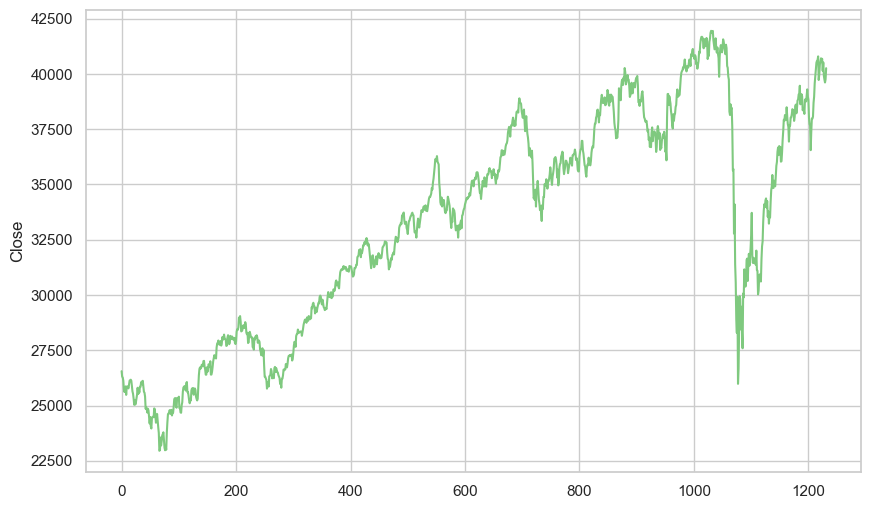

In [190]:
plt.figure(figsize=(10, 6))
df_prices['Close'].plot()
plt.ylabel('Close')

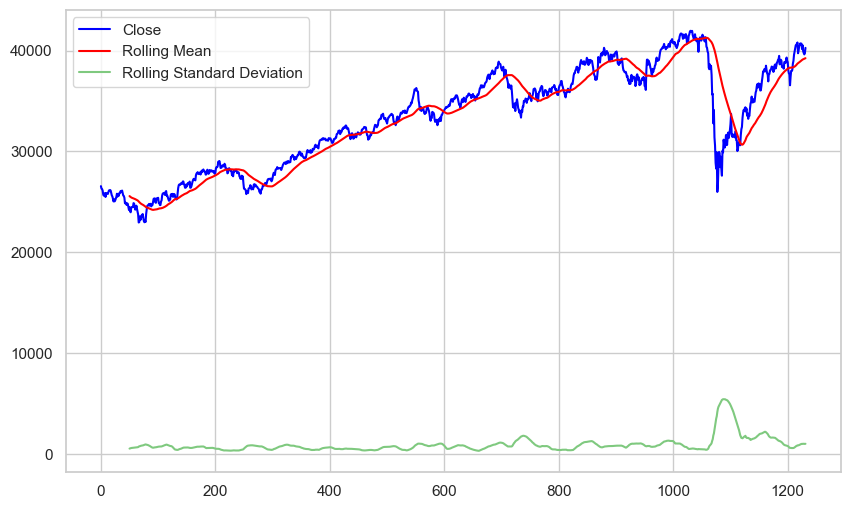

In [191]:
#Plotting moving average
close = df_prices['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns\n')

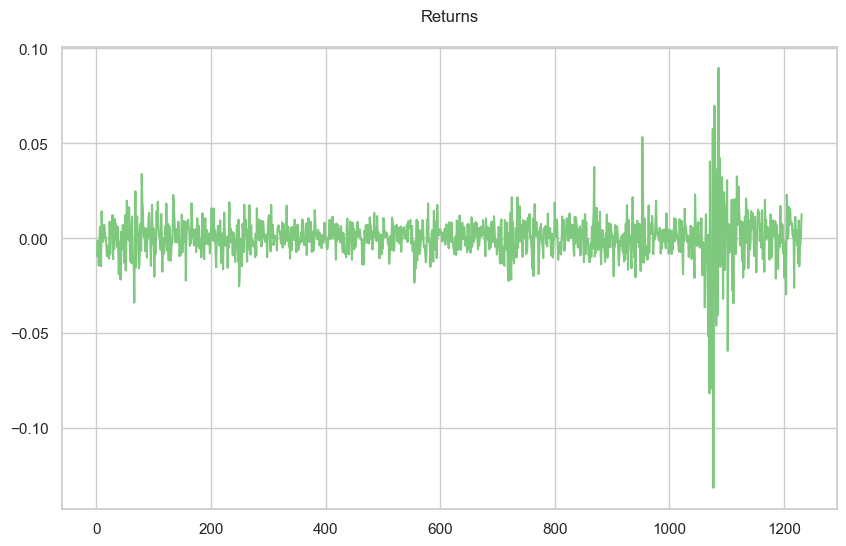

In [194]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return')
plt.title("Returns\n")

In [196]:
#split Data
train = df_prices[:1000]
test = df_prices[1000:]

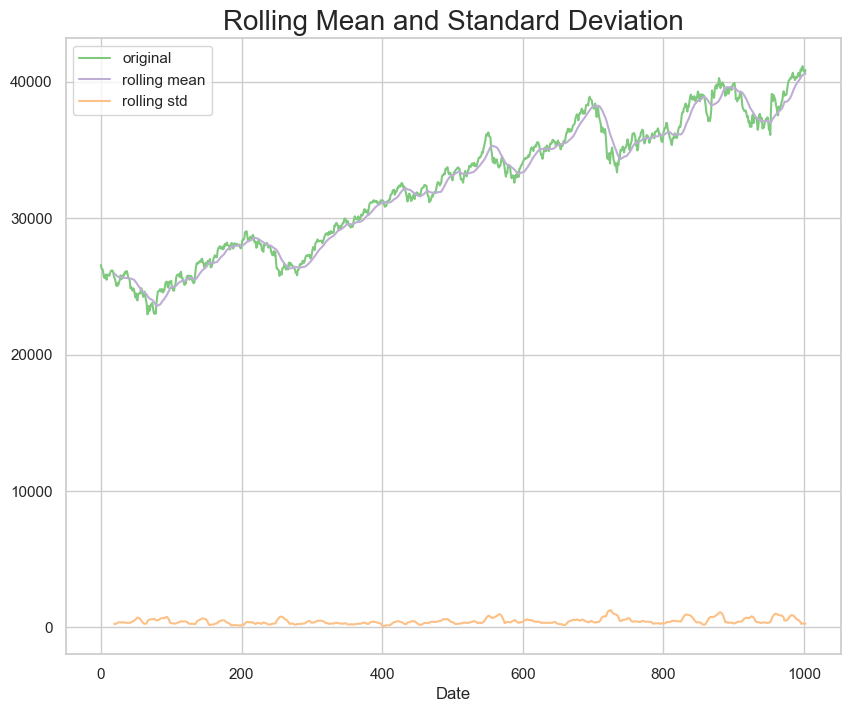

Results of dickey fuller test
ADF Test Statistic : -0.4732280929223063
p-value : 0.8971358249831984
#Lags Used : 1
Number of Observations Used : 998
Weak evidence against null hypothesis, time series is non-stationary 


In [204]:
#Stationarity test
def test_stationarity(timeseries):

 #Determing rolling statistics
     rolmean = timeseries.rolling(20).mean()
     rolstd = timeseries.rolling(20).std()

     #Plot rolling statistics:
     plt.figure(figsize = (10,8))
     plt.plot(timeseries, label = 'original')
     plt.plot(rolmean,  label = 'rolling mean')
     plt.plot(rolstd, label = 'rolling std')
     plt.xlabel('Date')
     plt.legend()
     plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
     plt.show(block = False)

     print('Results of dickey fuller test')
     result = adfuller(timeseries, autolag = 'AIC')
     labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
     for value,label in zip(result, labels):
        print(label+' : '+str(value) )
     if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
     else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

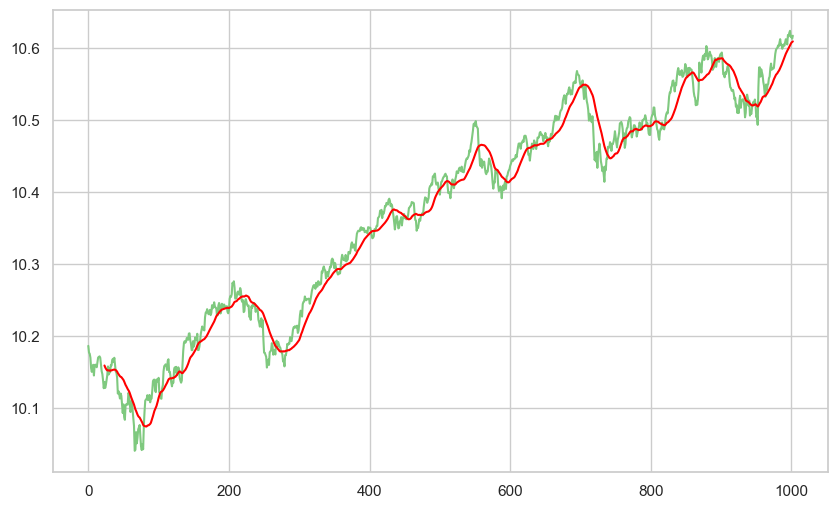

In [205]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

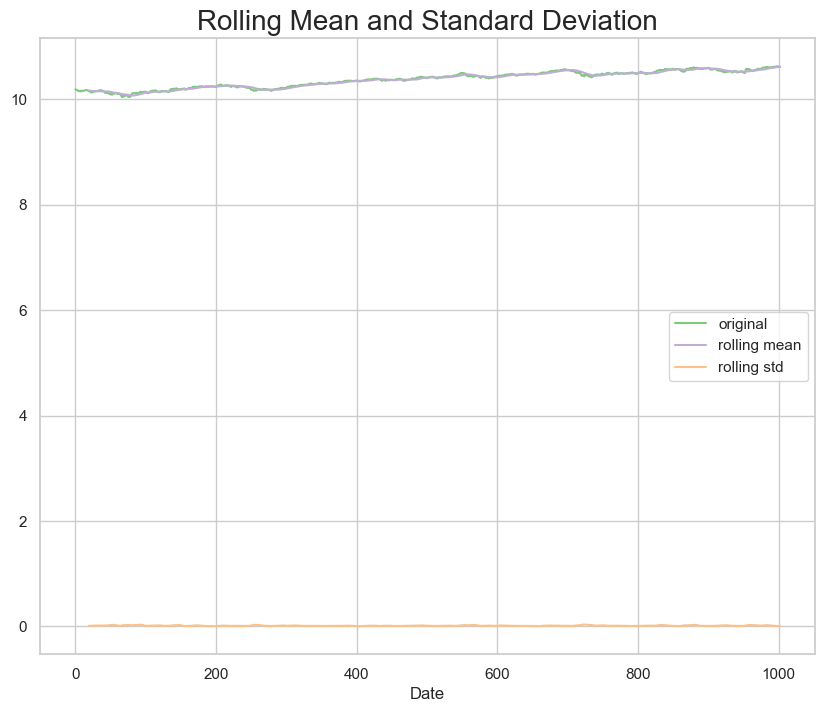

Results of dickey fuller test
ADF Test Statistic : -0.6123352293577643
p-value : 0.8681703390410612
#Lags Used : 1
Number of Observations Used : 998
Weak evidence against null hypothesis, time series is non-stationary 


In [206]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

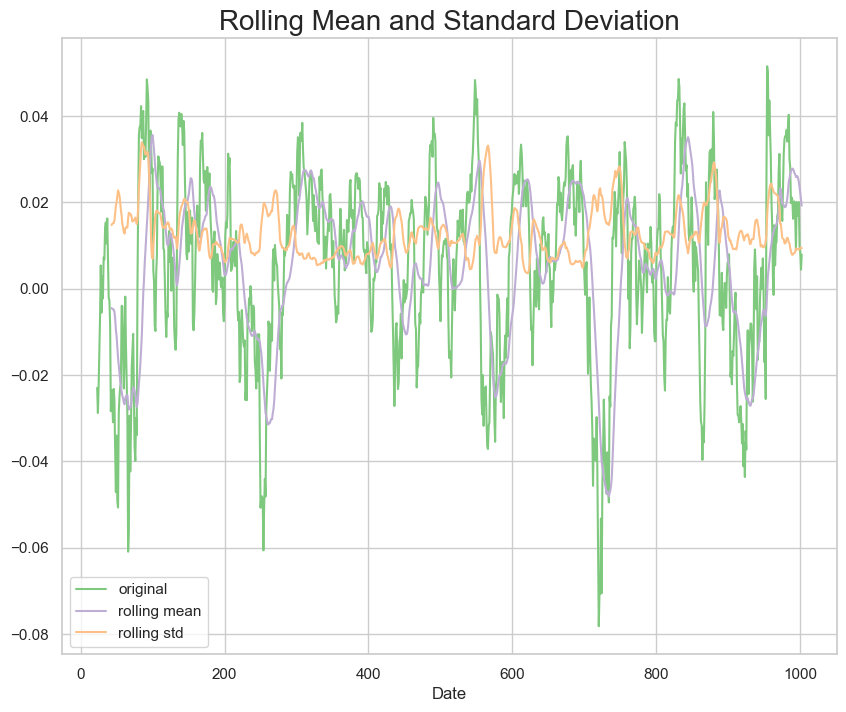

Results of dickey fuller test
ADF Test Statistic : -6.439825264393575
p-value : 1.61850368174566e-08
#Lags Used : 1
Number of Observations Used : 975
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [207]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

# 5- Model

In [209]:
#Using auto arima to make predictions using log data
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6791.632, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6797.076, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6798.262, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6798.158, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6796.209, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6796.488, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6796.386, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6794.384, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6797.713, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.774 seconds


In [210]:
predictions.fillna(10.7,inplace=True)
test_log.dropna(inplace=True)

Text(0, 0.5, 'Actual Stock Price')

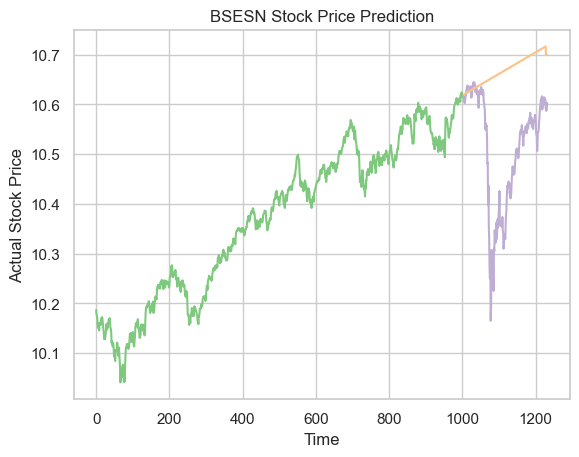

In [211]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [38]:
mean_squared_error(test_log,predictions)

0.03856532534636663

# =====================Textual  Analysis========================

# 1- Import data

In [2]:
news  = pd.read_csv('india-news-headlines.csv')

# 2- Understanding Data & Data Manipulation

In [3]:
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [4]:
news.shape

(3297172, 3)

In [5]:
news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [6]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [7]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [9]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [10]:
news['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [11]:
news['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
ballot-talk                     7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [13]:
news['headline_category'].value_counts().count()

1016

In [14]:
news['headline_text'].value_counts()

Sunny Leone HOT photos                                                                              98
Watch top news in one-minute                                                                        90
Official Site                                                                                       89
Football: Italian Serie A table                                                                     88
Football: Spanish La Liga table                                                                     86
                                                                                                    ..
Bengal hilsa to get brand identity                                                                   1
Hayatpur rerun averted in city                                                                       1
Govt kicks off land return process in Singur                                                         1
Labourer helps clear runway                                              

In [15]:
news['headline_text'].value_counts().count()

3082589

In [16]:
news.isnull().sum().sum()

0

In [17]:
news.duplicated().sum()

21585

In [18]:
news.duplicated(keep=False).sum()

41638

In [19]:
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [20]:
news[news.duplicated(keep=False)]


,publish_date,headline_category,headline_text
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
7,2001-01-02,unknown,America's unwanted heading for India?
10,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3296358,2020-06-29,city.kochi,Face-detection cams set to nab violators in Th...
3296538,2020-06-29,city.ranchi,To boost sales; liquor sellers in Jharkhand ur...
3296539,2020-06-29,city.ranchi,To boost sales; liquor sellers in Jharkhand ur...
3297012,2020-06-30,city.patna,Groom dead; 90 guests test Covid positive in P...


In [21]:
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [22]:
news.duplicated().sum()

0

In [24]:
lst = news['publish_date'].value_counts().index.tolist()

In [25]:
new = []
for x in lst:
    df = news.loc[news['publish_date'] == x]
    headlinetext = ''
    publishdate = str(x)
    headlinetext = df['headline_text'].iloc[0]
    for i in range(1 , len(df)):
        headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
    new.append(headlinetext)

In [101]:
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})
newsdf

,publish_date,headline_text
0,2018-07-31,Harley Davidson plans smaller bike with eye on...
1,2018-12-31,Court extends detention for Nissan ex-chair Gh...
2,2018-12-30,expect to nearly treble sales in india in 2019...
3,2014-12-31,Exclusive! BMW i8 India launch in February 201...
4,2017-12-31,53k casual jobs lost in Jan-Mar;overall employ...
...,...,...
7075,2001-03-13,Expose rocks nation
7076,2001-03-16,Tape and Tell
7077,2001-03-17,Crouching Tiger; Hidden Dragon
7078,2001-05-25,What Women Want


In [102]:
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)
newsdf.head()


,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
2,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
3,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
4,2001-01-05,Nepal won't allow anti-India activities: Envoy...


# 3- Data visualization

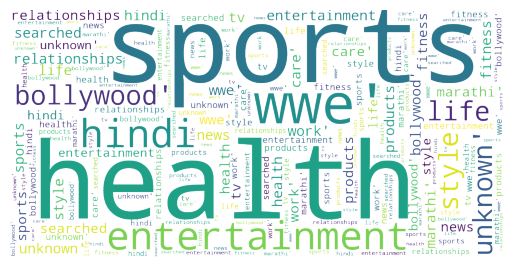

In [183]:
# headline_category most repeated word
wordcloud = WordCloud(width=1000, 
                      height=500,
                      prefer_horizontal=0.5,
                      background_color="rgba(255, 255, 255, 0)",
                      repeat=True,
                      mode="RGBA").generate(str(news['headline_category'].values))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

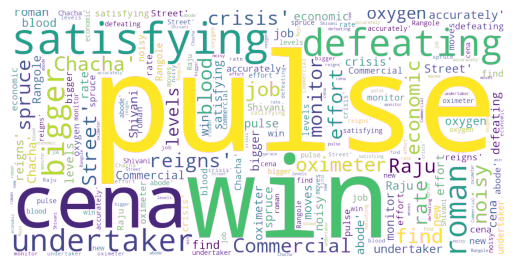

In [182]:
# headline_text most repeated word
wordcloud = WordCloud(width=1000, 
                      height=500,
                      prefer_horizontal=0.5,
                      background_color="rgba(255, 100, 255, 0)",
                      repeat=True,
                      mode="RGBA").generate(str(news['headline_text'].values))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 4- Features Extraction

In [103]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
    polarity.append(TextBlob(row['headline_text']).sentiment[0])
    subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [104]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity
newsdf.head()


,publish_date,headline_text,polarity,subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
2,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
3,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
4,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542


In [105]:
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)


In [106]:
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)
newsdf.shape

(7080, 3)

# 5- Merging datasets

In [107]:
bse_data = pd.merge(df_prices, newsdf, how='left', on=['date'])
bse_data.shape


(1228, 9)

In [108]:
bse_data.head()


,date,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity
0,2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0,0.082107,0.415369
1,2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0,0.079529,0.407367
2,2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0,0.068027,0.437314
3,2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0,0.103389,0.440146
4,2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0,0.084716,0.426899


In [109]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format="%Y-%m-%d")
bse_data.isnull().sum().sum()


178

In [110]:
bse_data.dropna(inplace = True)


In [111]:
bse_data.isnull().sum().sum()


0

# 6- Split Data

In [124]:
X = bse_data.drop(['date','Close'], axis = 1)
y = bse_data['Close']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7- Model

In [126]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, 
                            criterion='mse', max_depth = 30, min_samples_leaf=2, 
                            min_samples_split=5, n_jobs=1)

In [127]:
rfg.fit(X_train, y_train)


RandomForestRegressor(criterion='mse', max_depth=30, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, n_jobs=1,
                      random_state=42)

# 8- Model Evaluation

In [128]:
pred = rfg.predict(X_test)


In [130]:
r2_score(y_test, pred) 


0.999919451647465